# importing the dependencies

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

from sklearn.metrics import mean_absolute_error

# data collection and processing

In [97]:
#loading data from csv file.
car_set=pd.read_csv("car data.csv")

In [98]:
car_set.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
# checking the number of rows  and columns
car_set.shape

(301, 9)

In [100]:
# getting some information about dataset
car_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [101]:
#checking the missing values
car_set.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [102]:
#checking the distribution of categorical data
print(car_set.Fuel_Type.value_counts())
print(car_set.Seller_Type.value_counts())
print(car_set.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# encoding the categoorical data

In [103]:
# encoding "Fuel_Type" Column
car_set.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

# encoding "Seller_Type" Column
car_set.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

# encoding "Transmission" Column
car_set.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)



C:\Users\ziyau\AppData\Local\Temp\ipykernel_14412\4215980422.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_set.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
C:\Users\ziyau\AppData\Local\Temp\ipykernel_14412\4215980422.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_set.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
C:\Users\ziyau\AppData\Local\Temp\ipykernel_14412\4215980422.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

In [104]:
car_set.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# splitting the data into Training and Test data

In [105]:
X=car_set.drop(["Car_Name","Selling_Price"],axis=1)

In [106]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [107]:
Y=car_set["Selling_Price"]

In [108]:
#Splitting trainig and test data

In [109]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# model Training

In [110]:
#Linear Regression
Regressor=LinearRegression()
Regressor.fit(X_train,Y_train)


LinearRegression()

# model evaluation

In [111]:
Y_pred=Regressor.predict(X_test)

In [112]:
#R squared Error
error_score=metrics.r2_score(Y_pred,Y_test)
print(error_score)

0.8062199941176205


# visvalize the actual

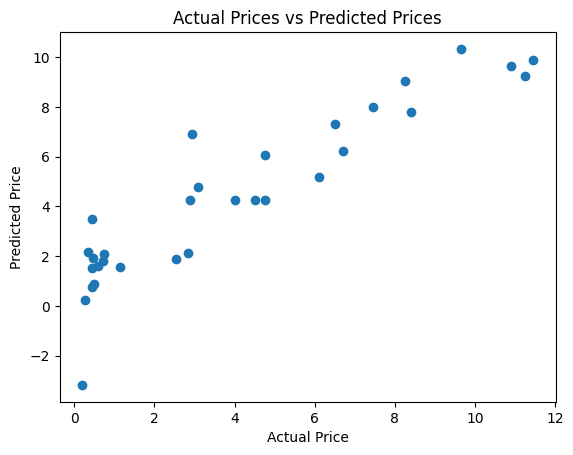

In [113]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [114]:
#lasso Regression

Regressor_lasso=Lasso()
Regressor_lasso.fit(X_train,Y_train)


Lasso()

In [115]:
Y_pred2=Regressor_lasso.predict(X_test)

In [116]:
#R squared Error
error_score=metrics.r2_score(Y_pred2,Y_test)
print(error_score)

0.7711110403265509


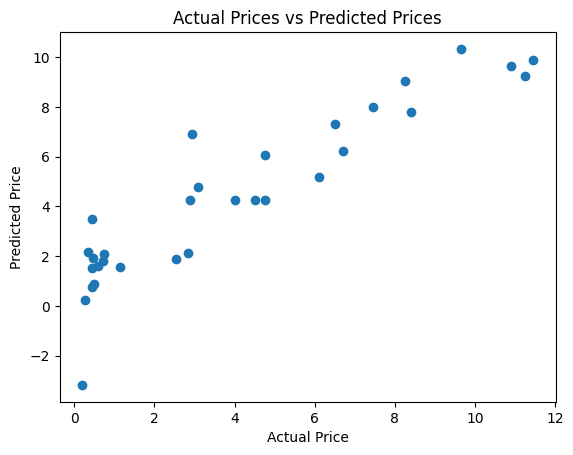

In [117]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [118]:
mae = mean_absolute_error(Y_test, Y_pred2)
print("MAE:", mae)

MAE: 1.0507413774170287


In [119]:
import pickle

In [120]:
with open("carPrediction.pkl","wb")as file:
    pickle.dump(Regressor,file)